# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


### Import libraries

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("darkgrid")

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters

# import warnings
# warnings.filterwarnings("ignore")

from pylab import rcParams
plt.rcParams["figure.figsize"] = (6,4)

# Tasks


### 1. Read dataset

In [3]:
df0 = pd.read_csv("store_sharing.csv")
df = df0.copy()
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 2. Check missing values and if there are any dublicate rows or not.

In [4]:
df.duplicated().value_counts()

False    17414
dtype: int64

In [5]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [8]:
df.isnull()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
17409,False,False,False,False,False,False,False,False,False,False
17410,False,False,False,False,False,False,False,False,False,False
17411,False,False,False,False,False,False,False,False,False,False
17412,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().melt(value_name="missing")

,variable,missing
0,timestamp,False
1,timestamp,False
2,timestamp,False
3,timestamp,False
4,timestamp,False
...,...,...
174135,season,False
174136,season,False
174137,season,False
174138,season,False


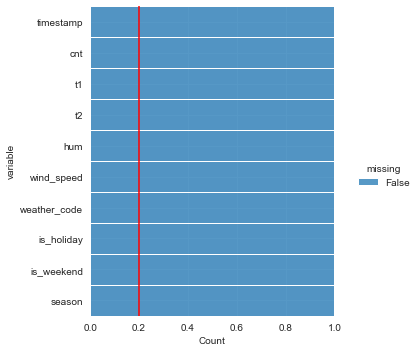

In [10]:
sns.displot(data=df.isnull().melt(value_name="missing"),
            y="variable",
            hue="missing",
           multiple="fill",
           height=5)
plt.axvline(0.2, color="r")
plt.show()

### 3. Plot the distribution of various discrete features on (Season, holiday, weekend and weathercode)

**season**

In [11]:
print("Spring months :", df[df["season"]==0]["timestamp"].str[5:7].unique())
print("Summer months :", df[df["season"]==1]["timestamp"].str[5:7].unique())
print("Fall months   :", df[df["season"]==2]["timestamp"].str[5:7].unique())
print("Winter months :", df[df["season"]==3]["timestamp"].str[5:7].unique())

Spring months : ['03' '04' '05']
Summer months : ['06' '07' '08']
Fall months   : ['09' '10' '11']
Winter months : ['01' '02' '12']


In [12]:
season = df.season.value_counts(dropna=False)
print(season.index)
print(season.values)

Float64Index([0.0, 1.0, 3.0, 2.0], dtype='float64')
[4394 4387 4330 4303]


In [13]:
print(season.values)

[4394 4387 4330 4303]


In [14]:
print(*enumerate(season.values))

(0, 4394) (1, 4387) (2, 4330) (3, 4303)


In [15]:
for index, value in enumerate(season.values):
    print(index, value)

0 4394
1 4387
2 4330
3 4303


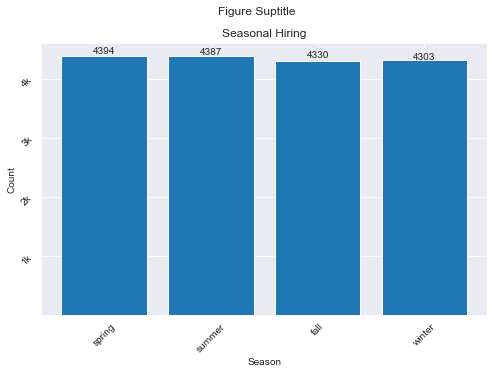

In [16]:
# with Matplotlib Functional

plt.figure(figsize=(8,5))

plt.suptitle("Figure Suptitle")

plt.bar(x = df.season.value_counts().index, height=df.season.value_counts().values)

plt.title("Seasonal Hiring")
plt.xlabel("Season")
plt.ylabel("Count")
plt.xticks([0,1,2,3],["spring", "summer", "fall", "winter"], rotation=45)
plt.yticks([1000,2000,3000,4000],["1k","2k","3k","4k"], rotation=45)

for index, value in enumerate(season.values):
    plt.text(index, 
             value, 
             str(value), 
             va="bottom", 
             ha="center")
    
plt.show()

**is_holiday**

In [17]:
is_holiday = df.is_holiday.value_counts(dropna=False)

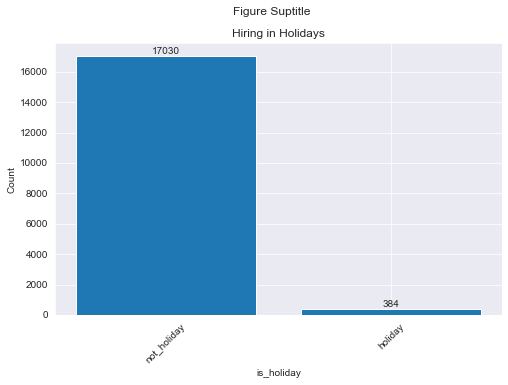

In [18]:
# with Matplotlib OOM

fig, ax = plt.subplots(figsize=(8,5))

fig.suptitle("Figure Suptitle")

ax.bar(x = is_holiday.index, height=is_holiday.values)

ax.set_title("Hiring in Holidays")
ax.set_xlabel("is_holiday")
ax.set_ylabel("Count")
ax.set_xticks([0,1],["not_holiday", "holiday"], rotation=45)

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

In [19]:
ax.containers[0]

<BarContainer object of 2 artists>

**is_weekend**

In [20]:
is_weekend = df.is_weekend.value_counts(dropna=False)

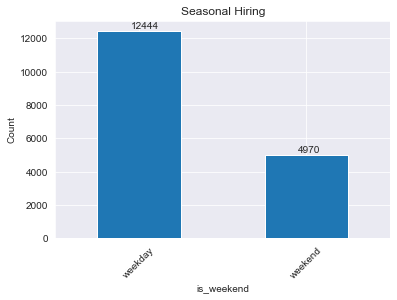

In [21]:
# with Pandas

# plt.figure(figsize=(8,5))

ax = df.is_weekend.value_counts().plot.bar(x = is_weekend.index, y = is_weekend.values);

ax.set_title("Seasonal Hiring")
ax.set_xlabel("is_weekend")
ax.set_ylabel("Count")
ax.set_xticks([0,1],["weekday", "weekend"], rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), 
                (p.get_x()+0.20, p.get_height()+150))

plt.show()

In [22]:
ax.patches

<Axes.ArtistList of 2 patches>

In [23]:
ax.patches[0]

In [24]:
ax.patches[0].get_x()

-0.25

In [25]:
ax.get_xlim()

(-0.5, 1.5)

In [26]:
ax.get_ylim()

(0.0, 13066.2)

In [27]:
ax.patches[0].get_height()

12444

**weather_code**

In [28]:
weather_code = df.weather_code.value_counts(dropna=False)

/Users/kadiryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


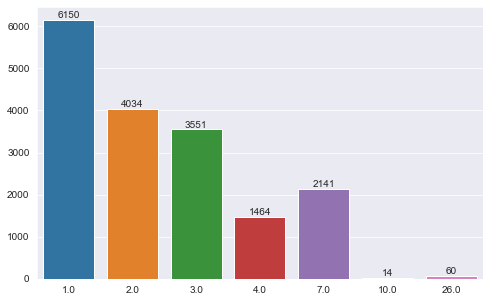

In [29]:
# With Seaborn Barplot

fig, ax = plt.subplots(figsize=(8,5))

ax = sns.barplot(weather_code.index, weather_code.values)

ax.bar_label(ax.containers[0], fmt='%d');

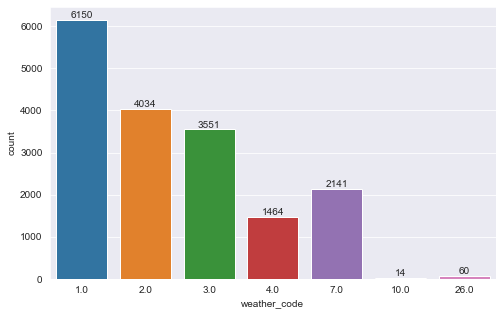

In [30]:
# With Seaborn Countplot

fig, ax = plt.subplots(figsize=(8,5))

ax = sns.countplot(x = df.weather_code, data=df)

for container in ax.containers:
    ax.bar_label(container)

### 4. Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [32]:
df.timestamp.dtype

dtype('O')

In [33]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [34]:
df.timestamp.dtype

dtype('<M8[ns]')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [36]:
df.set_index("timestamp", inplace=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [37]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

- We have a 2-year timestamp, so let us do Feature Engineering by using `year, month, day_of_month, day_of_week, hour`

### 5. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

You can use strftime('%Y-%m') for year_mount

In [38]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [39]:
df.index.year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='timestamp', length=17414)

In [40]:
df["year_month"] = df.index.strftime("%Y-%m")
df["year"] = df.index.year
df["month"] = df.index.month
df["day_of_month"] = df.index.day
df["day_of_week"] = df.index.dayofweek
df["hour"] = df.index.hour

In [41]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### 6. Visualize the correlation with a heatmap

In [42]:
df.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180,0.010046,0.063757,-0.017887,-0.068688,0.324423
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851,-0.037959,0.332712,0.005072,-0.002317,0.168708
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900,-0.044972,0.368366,0.006791,-0.006824,0.153956
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381,0.072443,0.113149,-0.020868,0.011556,-0.295653
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305,-0.094739,-0.086383,0.002040,0.001708,0.141792
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,-0.009234,-0.033253,0.001904,0.020619,-0.041786
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488,0.034631,-0.011511,0.042657,-0.144628,-0.000288
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067,0.003049,-0.005406,0.005721,0.791975,0.001803
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000,0.024400,0.203249,-0.006460,0.002356,0.000006
year,0.010046,-0.037959,-0.044972,0.072443,-0.094739,-0.009234,0.034631,0.003049,0.024400,1.000000,-0.026547,-0.021935,-0.002876,0.000542


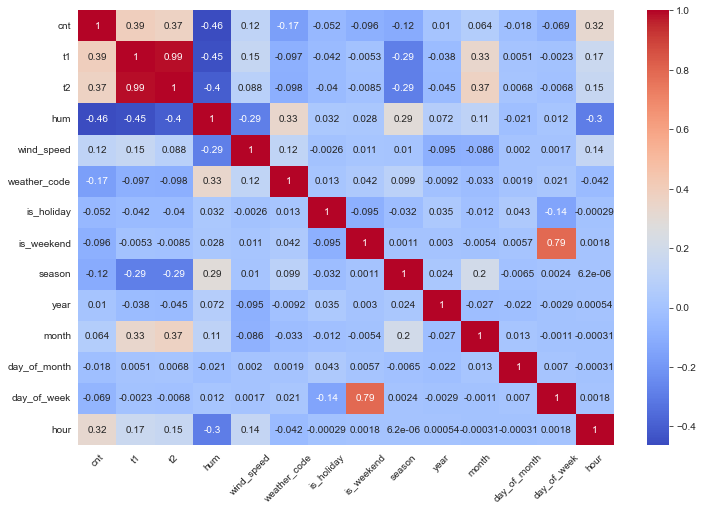

In [43]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.xticks(rotation=45)

plt.show()

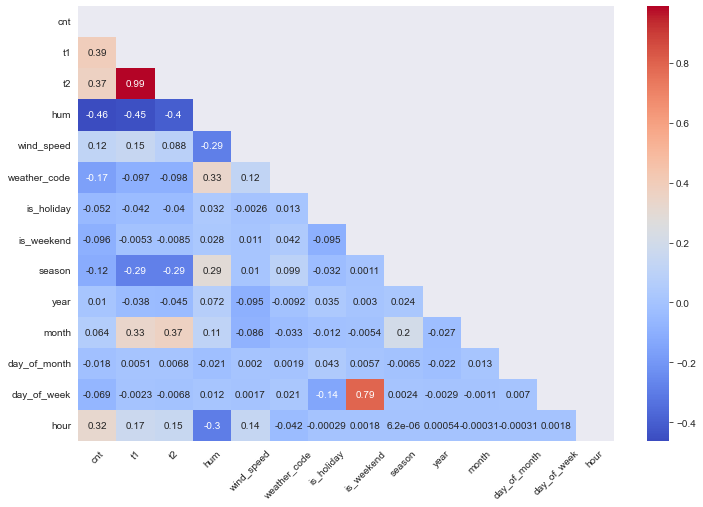

In [44]:
matrix = np.triu(df.corr())

plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot=True, cmap="coolwarm", mask=matrix)
plt.xticks(rotation=45)

plt.show()

In [45]:
df.corr().iloc[:,0]

cnt             1.000000
t1              0.388798
t2              0.369035
hum            -0.462901
wind_speed      0.116295
weather_code   -0.166633
is_holiday     -0.051698
is_weekend     -0.096499
season         -0.116180
year            0.010046
month           0.063757
day_of_month   -0.017887
day_of_week    -0.068688
hour            0.324423
Name: cnt, dtype: float64

In [46]:
type(df.corr()["cnt"])

pandas.core.series.Series

In [47]:
df.corr()["cnt"].shape

(14,)

In [48]:
df.corr()["cnt"].values.reshape(14,1)

array([[ 1.        ],
       [ 0.38879845],
       [ 0.36903479],
       [-0.46290096],
       [ 0.11629523],
       [-0.16663276],
       [-0.0516983 ],
       [-0.09649912],
       [-0.11618023],
       [ 0.01004604],
       [ 0.06375725],
       [-0.01788673],
       [-0.06868785],
       [ 0.32442347]])

In [49]:
df.corr()[["cnt"]]

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hum,-0.462901
wind_speed,0.116295
weather_code,-0.166633
is_holiday,-0.051698
is_weekend,-0.096499
season,-0.116180
year,0.010046


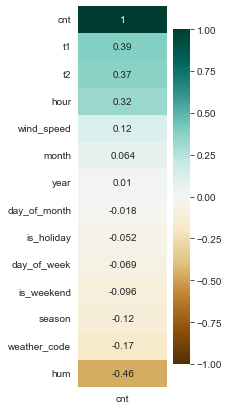

In [51]:
plt.figure(figsize=(2,7))

sns.heatmap(df.corr()[["cnt"]].sort_values(by="cnt", ascending=False), annot=True, cmap="BrBG", vmin=-1, vmax=1)

plt.show()

### 7. Visualize the correlation of the target variable and the other features with barplot

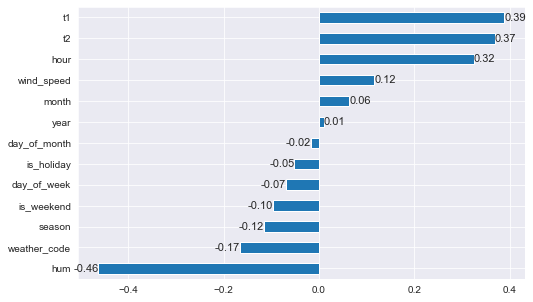

In [52]:
plt.figure(figsize=(8,5))

ax = df.corr()["cnt"].iloc[1::].sort_values().plot.barh()

ax.bar_label(ax.containers[0], fmt="%.2f", fontsize=11)

plt.show()

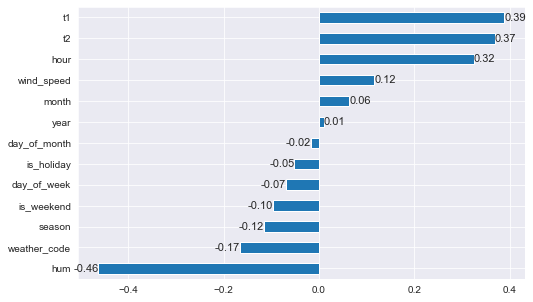

In [53]:
# peki burada cnt target featureın kendisiyle corrunu nasıl kaldırırız: iloc ile:

plt.figure(figsize=(8,5))

ax = df.corr()["cnt"].iloc[1::].sort_values().plot.barh()

ax.bar_label(ax.containers[0], fmt="%.2f", fontsize=11)

plt.show()


In [54]:
df.corr()[["cnt"]].iloc[1::]

,cnt
t1,0.388798
t2,0.369035
hum,-0.462901
wind_speed,0.116295
weather_code,-0.166633
is_holiday,-0.051698
is_weekend,-0.096499
season,-0.116180
year,0.010046
month,0.063757


### 8. Plot bike shares over time use lineplot

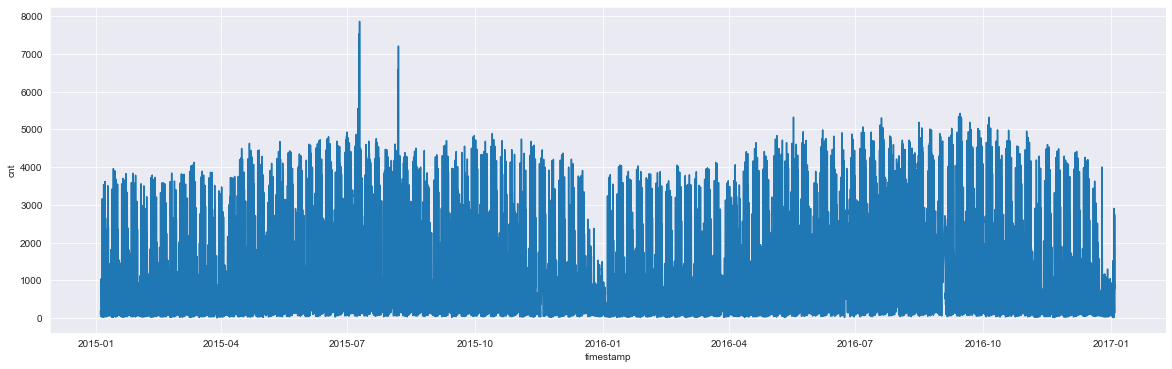

In [55]:
plt.figure(figsize=(20,6))

sns.lineplot(x=df.index,
             y="cnt",
             data=df)

plt.show()

### 9. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [56]:
df.groupby("month")["cnt"].mean()

month
1      784.691997
2      836.279617
3      921.294959
4     1112.953408
5     1275.099462
6     1383.354430
7     1543.696151
8     1463.116577
9     1356.597561
10    1217.546991
11     965.867832
12     845.516173
Name: cnt, dtype: float64

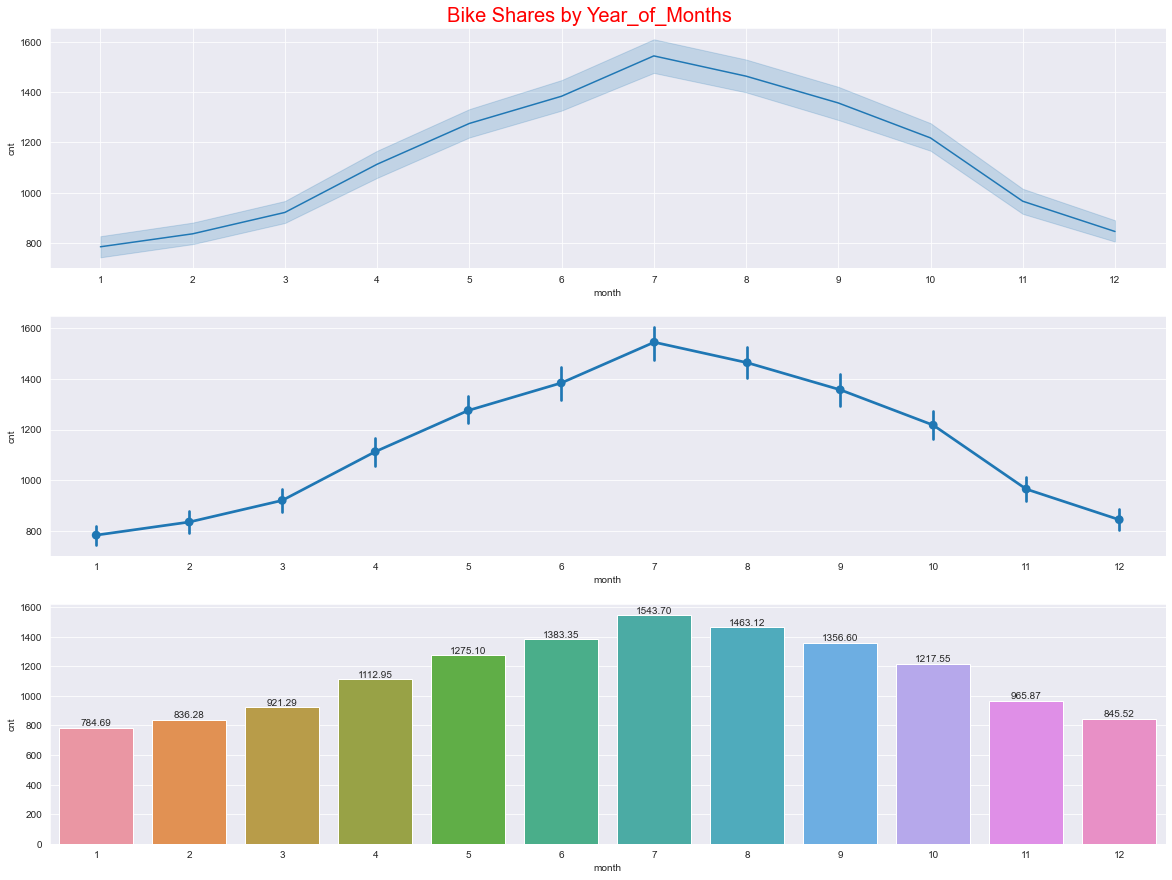

In [57]:
plt.figure(figsize=(20,15))

plt.suptitle("Bike Shares by Year_of_Months", y=0.90, fontsize=20, color="r")

plt.subplot(3,1,1)
sns.lineplot(x=df["month"], y=df["cnt"])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.subplot(3,1,2)
sns.pointplot(x=df["month"], y=df["cnt"])
plt.subplot(3,1,3)
ax = sns.barplot(x=df["month"], y=df["cnt"], ci=None)

ax.bar_label(ax.containers[0], fmt="%.2f")

plt.show()

In [58]:
df.groupby("year_month")["cnt"].mean()

year_month
2015-01     814.663189
2015-02     810.125186
2015-03     941.723951
2015-04    1156.581363
2015-05    1203.512097
2015-06    1441.076709
2015-07    1514.441892
2015-08    1389.719086
2015-09    1255.243319
2015-10    1175.334239
2015-11     952.646976
2015-12     814.645946
2016-01     782.954301
2016-02     861.787791
2016-03     900.585734
2016-04    1069.325452
2016-05    1346.686828
2016-06    1324.649645
2016-07    1572.910931
2016-08    1536.910811
2016-09    1462.106881
2016-10    1259.362046
2016-11     978.941586
2016-12     876.220430
2017-01     523.333333
Name: cnt, dtype: float64

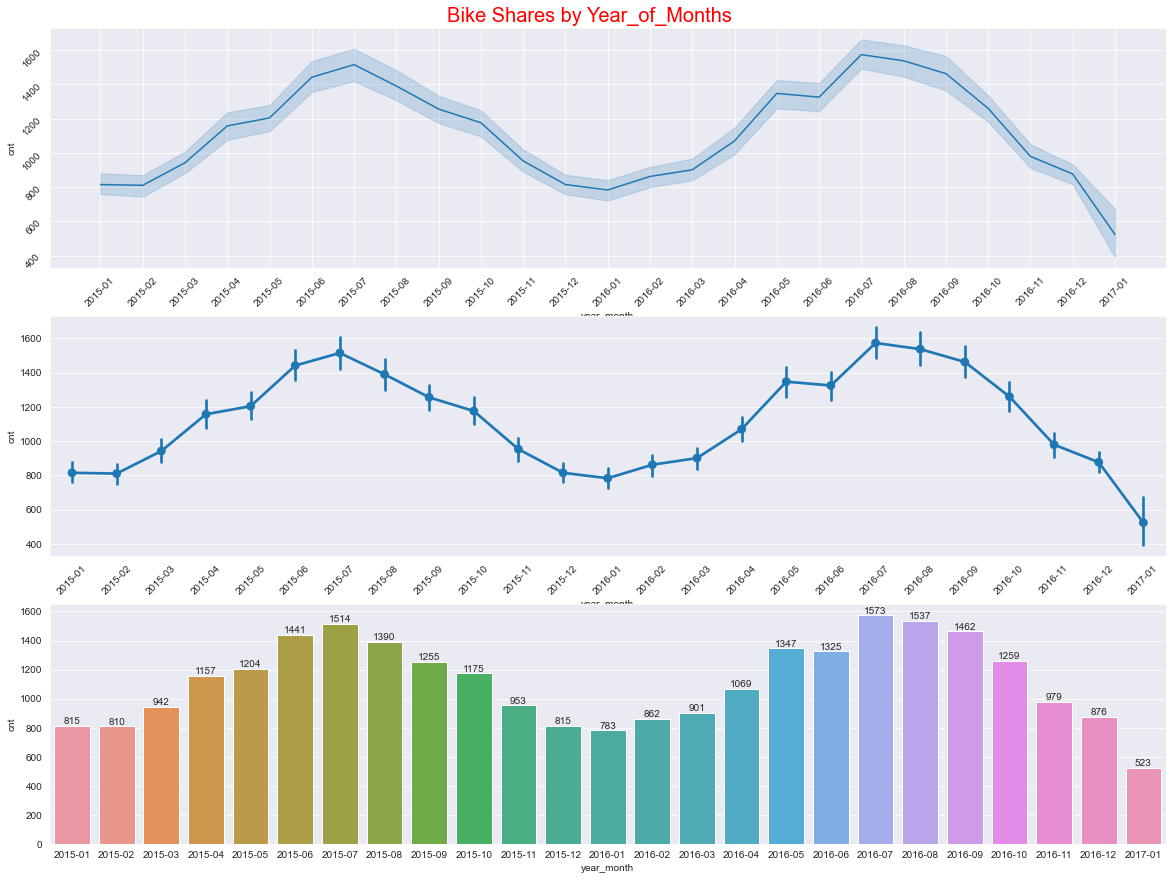

In [59]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,15))

fig.suptitle("Bike Shares by Year_of_Months", y=0.90, fontsize=20, color="r")

sns.lineplot(x=df["year_month"], y=df["cnt"], ax= ax[0])
ax[0].tick_params(labelrotation=45)

sns.pointplot(x=df["year_month"], y=df["cnt"], ax= ax[1])
ax[1].set_xticklabels(df.year_month.unique(), rotation=45)

sns.barplot(x=df["year_month"], y=df["cnt"], ax= ax[2], ci=None)

ax[2].bar_label(ax[2].containers[0], fmt="%.0f")

plt.show()

### 10. Plot bike shares by hours on (holidays, weekend, season)

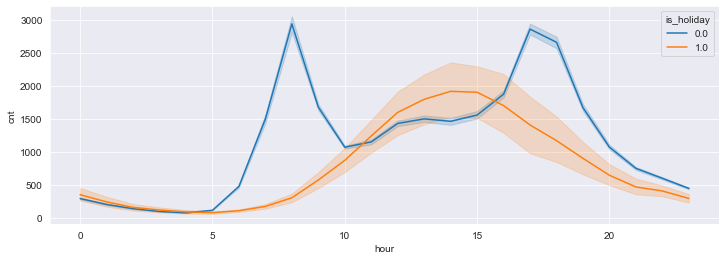

In [60]:
plt.figure(figsize=(12,4))

sns.lineplot(x=df["hour"], y=df["cnt"], hue=df["is_holiday"])

plt.show()

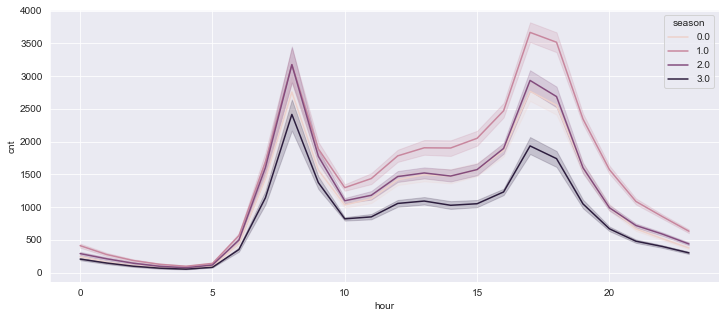

In [61]:
plt.figure(figsize=(12,5))

sns.lineplot(x=df["hour"], y=df["cnt"], hue=df["season"])

plt.show()

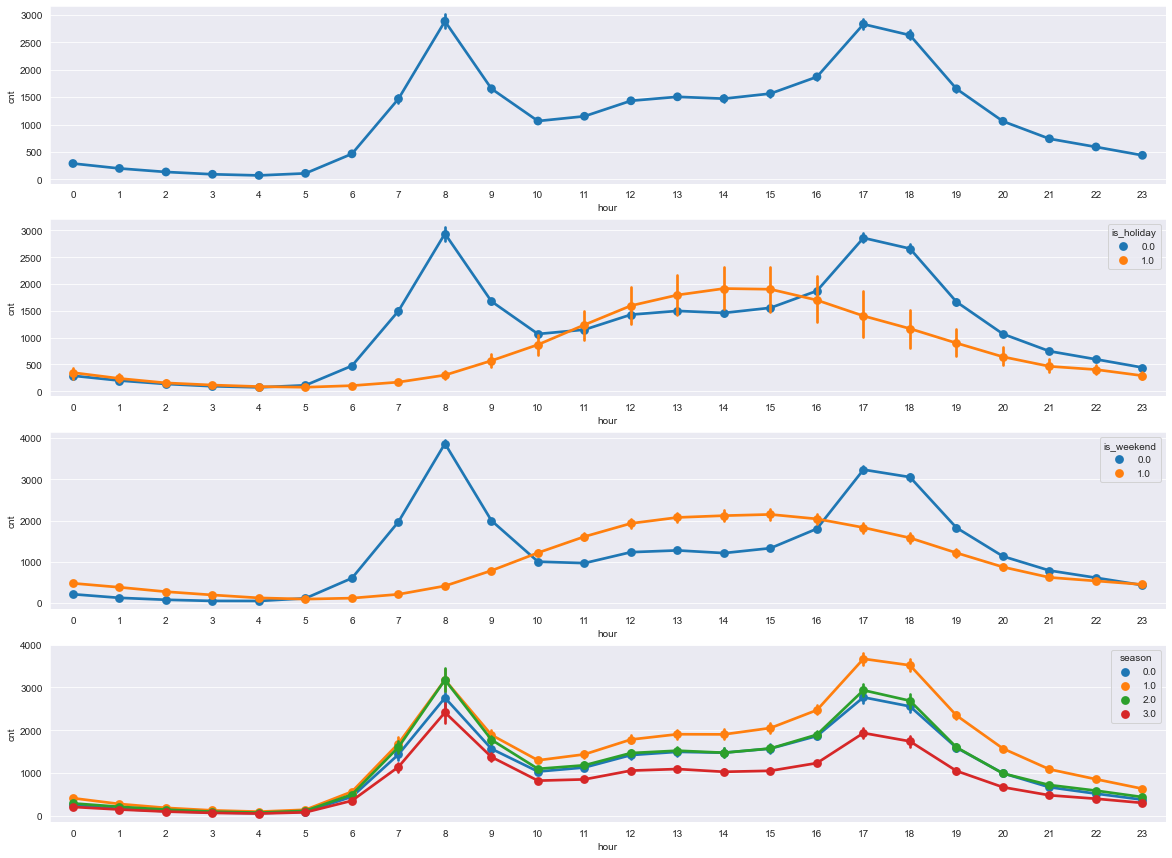

In [62]:
plt.figure(figsize=(20,15))

plt.subplot(4,1,1)
sns.pointplot(x=df["hour"], y=df["cnt"])
plt.subplot(4,1,2)
sns.pointplot(x=df["hour"], y=df["cnt"], hue=df["is_holiday"])
plt.subplot(4,1,3)
sns.pointplot(x=df["hour"], y=df["cnt"], hue=df["is_weekend"])
plt.subplot(4,1,4)
sns.pointplot(x=df["hour"], y=df["cnt"], hue=df["season"])

plt.show()

### 11. Plot bike shares by day of week
- You may want to see whether it is a holiday or not

In [63]:
df.groupby("day_of_week")["cnt"].mean()

day_of_week
0    1130.270734
1    1230.105389
2    1244.409000
3    1258.810594
4    1182.772653
5     995.553753
6     959.567265
Name: cnt, dtype: float64

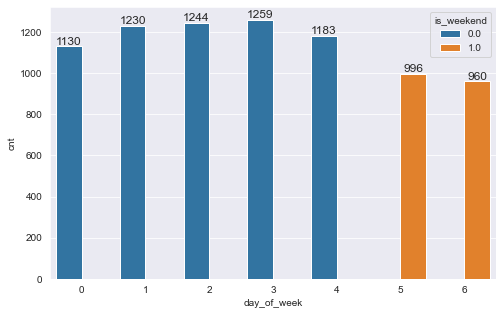

In [64]:
fig = plt.figure(figsize=(8,5))

ax = sns.barplot(x = df.day_of_week,y = df.cnt, hue = df.is_weekend, ci = None)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=12);

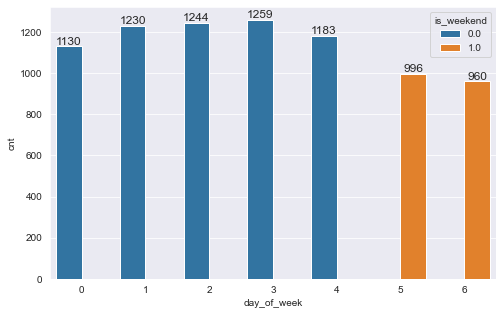

In [65]:
fig = plt.figure(figsize=(8,5))

ax = sns.barplot(x = df["day_of_week"], y = df["cnt"], hue = df["is_weekend"], ci = None)
# ax.set_xticks([0,1,2,3,4,5,6], ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=12);

plt.show()

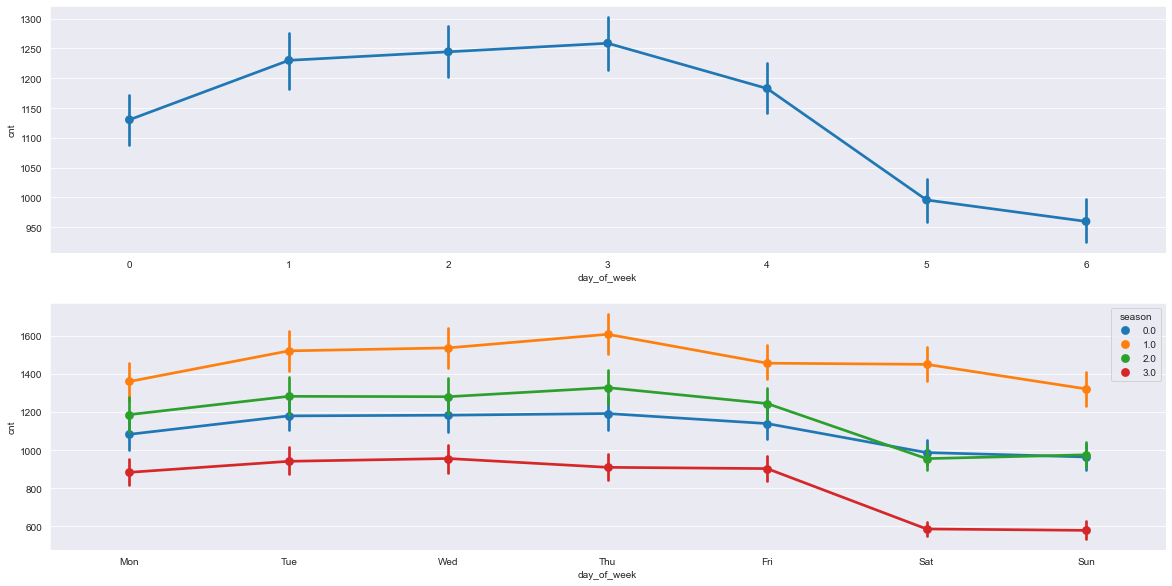

In [66]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
sns.pointplot(x=df["day_of_week"], y=df["cnt"])
plt.subplot(2,1,2)
sns.pointplot(x=df["day_of_week"], y=df["cnt"], hue=df["season"])
plt.xticks([0,1,2,3,4,5,6], ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

plt.show()

### 12. Plot bike shares by day of month

In [67]:
dom = pd.DataFrame(df.groupby("day_of_month")["cnt"].mean().apply(lambda x : round(x))).rename_axis("dom")
dom

,cnt
dom,
1,1077
2,1088
3,1128
4,1144
5,1141
6,1211
7,1194
8,1223
9,1261


<AxesSubplot:xlabel='day_of_month', ylabel='cnt'>

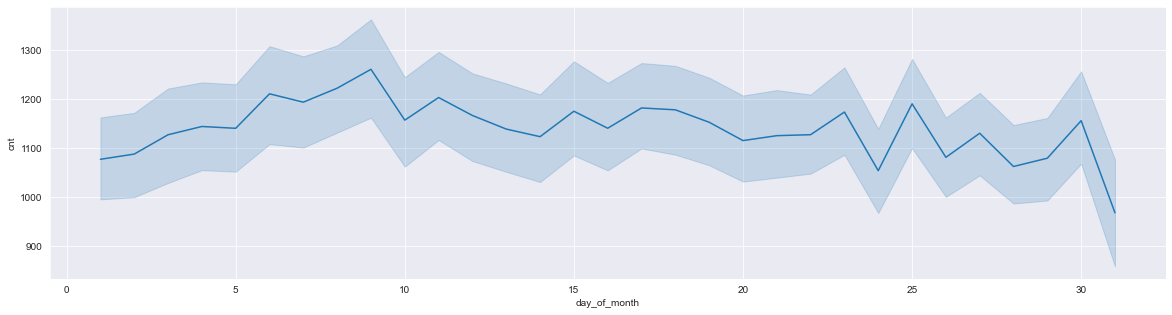

In [68]:
plt.figure(figsize = (20,5))
sns.lineplot(x = df["day_of_month"], y = df["cnt"])

dom,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,1204,1167,1139,1124,1176,1141,1182,1179,1153,1116,1126,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


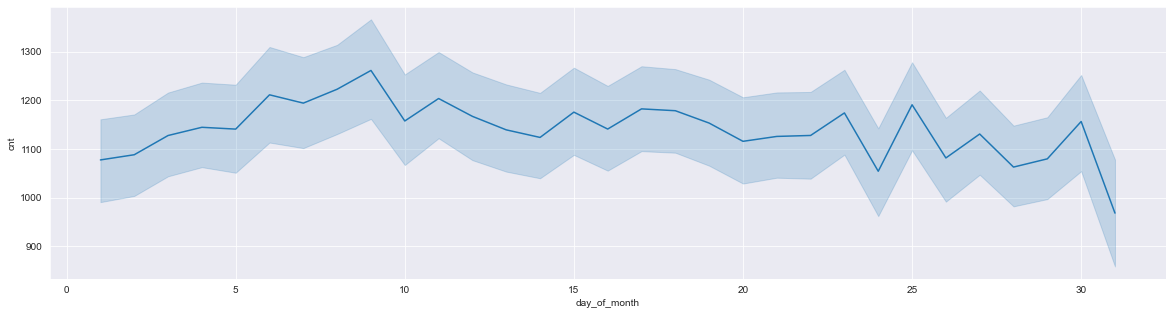

In [69]:
plt.figure(figsize = (20,5))

sns.lineplot(x = df["day_of_month"], y = df["cnt"])

pd.set_option('display.max_columns', None)
dom.T

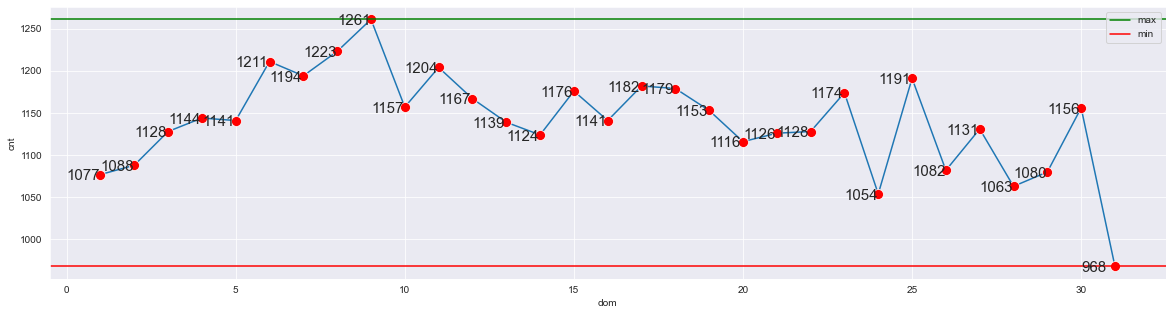

In [70]:
plt.figure(figsize=(20,5))

sns.lineplot(x = dom.index, y = dom.cnt, linestyle = "-", marker = "o", markerfacecolor = "r", markersize = 10)
plt.axhline(1261, c = "g", label = "max")
plt.axhline(968, c = "r", label = "min")
plt.legend(loc = 1)

for index, value in enumerate(dom.cnt.values):
    plt.text(index, value, str(value), va = "center_baseline", ha = "left", fontsize = 15)

### 13. Plot bike shares by year
### Plot bike shares on holidays by seasons

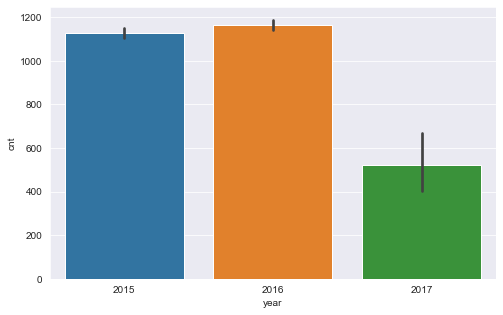

In [71]:
plt.figure(figsize=(8,5))

sns.barplot(x = df["year"], y = df["cnt"])

plt.show()

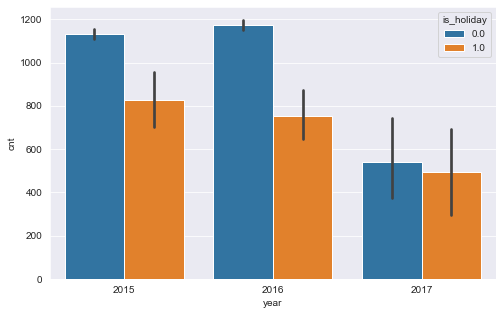

In [72]:
plt.figure(figsize=(8,5))

sns.barplot(x = df["year"], y = df["cnt"], hue = df["is_holiday"])

plt.show()

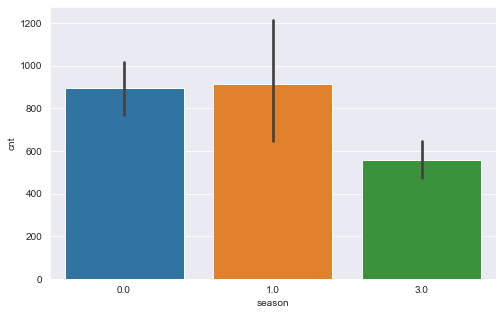

In [73]:
plt.figure(figsize=(8,5))

sns.barplot(x = "season", y = "cnt", data = df[df["is_holiday"]==1])

plt.show()

In [74]:
df[df["is_holiday"]==0].groupby("season")["cnt"].mean()

season
0.0    1113.428129
1.0    1470.567873
2.0    1178.954218
3.0     830.868371
Name: cnt, dtype: float64

In [75]:
df[df["is_holiday"]==1].groupby("season")["cnt"].mean()

season
0.0    893.807292
1.0    912.812500
3.0    556.055556
Name: cnt, dtype: float64

### 14. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [76]:
df.is_weekend.value_counts(dropna=False)

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [77]:
df.is_weekend.value_counts(dropna=False, normalize=True) * 100

0.0    71.459745
1.0    28.540255
Name: is_weekend, dtype: float64

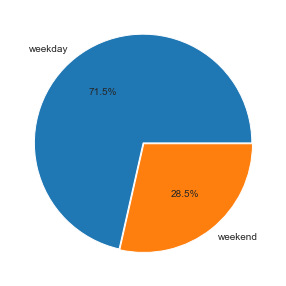

In [78]:
fig, ax = plt.subplots(figsize = (5,5))

ax.pie(x = df.is_weekend.value_counts(dropna=False).values,
       explode = [0,0.01],
       labels = ["weekday", "weekend"],
       autopct = "%.1f%%")

plt.show()

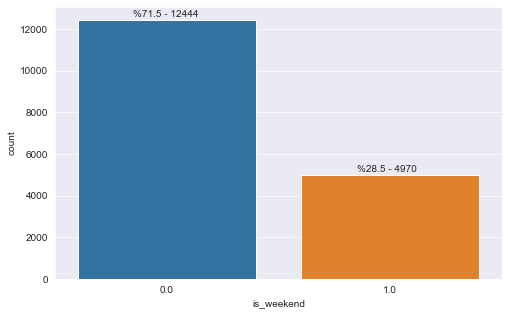

In [79]:
plt.figure(figsize = (8,5))

ax = sns.countplot(x = df["is_weekend"])

for p in ax.patches:
    ax.annotate("%" + str(round(100 * p.get_height() / len(df), 1)) + " - " + str(p.get_height()),
                (p.get_x()+0.25, p.get_height()+150))

plt.show()

### 15. Plot the distribution of weather code by seasons

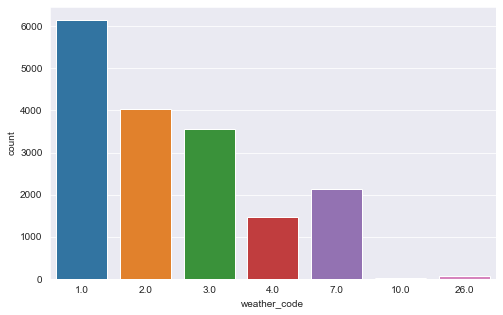

In [80]:
plt.figure(figsize = (8,5))

sns.countplot(x = df["weather_code"])

plt.show()

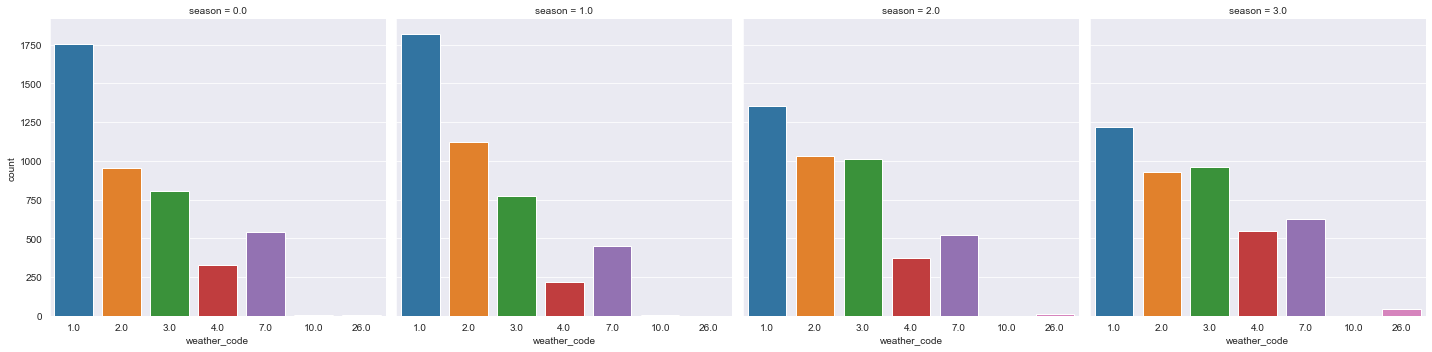

In [81]:
g = sns.catplot(x="weather_code", col="season", data=df, kind='count');

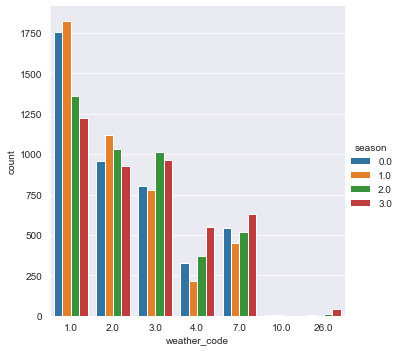

In [82]:
sns.catplot(x="weather_code", hue="season", data=df, kind='count')
plt.show()

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

___